# Energy Indicators, GDP, & Tech Rank by Sciamgo Journal

In [11]:
import pandas as pd
import numpy as np

### The following code does the following:

**Energy dataset**

1. Loads the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.
2. Excludes the footer and header information from the datafile. As well, the first two columns are unneccessary, so we need to get rid of them, and then, it changes the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

3. Converts `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). 
4. Renames the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

Also, it cleans up the country names that are improper.

**GDP Dataset**
    
1. Loads the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 
2. Skips the header and footer, and renames the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

**Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology Dataset**

1. Loads the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.


Merging the above datasets into a new dataset:
1. Uses only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 
2. The new dataset has the following columns:
['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].


In [7]:
energy = (pd.read_excel("Energy Indicators.xls",skiprows = 17,usecols = [2,3,4,5],index_col = None, nrows = 227, 
                        names= ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],na_values = '...'))
energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x: 1000000*x)
energy = energy.set_index('Country')
energy.index = energy.index.str.split('\s\(').str[0].str.strip('0123456789')
countryChangeDict = ({"United States of America":"United States",
                      'Republic of Korea':'South Korea',
                      'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                      'China, Hong Kong Special Administrative Region': 'Hong Kong'})
for key, values in countryChangeDict.items():
        energy.index.values[energy.index.values == key] = values
    
# Loading GDP dataset
GDP = pd.read_csv('world_bank.csv',header = 0,skiprows = 4,index_col = 0)
countryChangeDict1 = ({"Korea, Rep.": "South Korea",
                       "Iran, Islamic Rep.": "Iran",
                       "Hong Kong SAR, China": "Hong Kong"})
for key, values in countryChangeDict1.items():
        GDP.index.values[GDP.index.values == key] = values
    
# Loading Sciamgo Journal Country Rank dataset
ScimEn = pd.read_excel('scimagojr-3.xlsx',header = 0, index_col =1)

# Merging 3 dataframes 
MerDat = (ScimEn.merge(energy,how = 'inner', left_index = True, right_index = True).merge(GDP[['2006', '2007', '2008', '2009', 
                '2010', '2011', '2012', '2013', '2014', '2015']], how ='inner',left_index = True, right_index = True))

In [8]:
MerDat

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [53]:
Top15 = MerDat.sort_values(by = 'Rank').head(15)
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.660647e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,1.106715e+12


### Average GDP of countries

In [18]:
Top15['avgGDP'] = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].apply(np.mean, axis = 1)
Top15['avgGDP'].sort_values(ascending = False).head(15)

United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Maximum Renewable Energy and percentage

In [21]:
(Top15['% Renewable'].idxmax(),Top15['% Renewable'].max())

('Brazil', 69.64803)

### Mean Energy Supply per Capita

In [23]:
Top15['Energy Supply per Capita'].mean()

157.6

### Population estimate from Energy Supply per Capita

In [27]:
Top15['Pop_estimate'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15['Pop_estimate']

China                 1.367645e+09
United States         3.176154e+08
Japan                 1.274094e+08
United Kingdom        6.387097e+07
Russian Federation    1.435000e+08
Canada                3.523986e+07
Germany               8.036970e+07
India                 1.276731e+09
France                6.383735e+07
South Korea           4.980543e+07
Italy                 5.990826e+07
Spain                 4.644340e+07
Iran                  7.707563e+07
Australia             2.331602e+07
Brazil                2.059153e+08
Name: Pop_estimate, dtype: float64

### Number of Citable documents per person

In [28]:
Top15['Citable documents per Capita'] = Top15['Citable documents']/Top15['Pop_estimate']
Top15['Citable documents per Capita']

China                 0.000093
United States         0.000298
Japan                 0.000238
United Kingdom        0.000319
Russian Federation    0.000128
Canada                0.000500
Germany               0.000209
India                 0.000012
France                0.000203
South Korea           0.000239
Italy                 0.000180
Spain                 0.000201
Iran                  0.000114
Australia             0.000374
Brazil                0.000042
Name: Citable documents per Capita, dtype: float64

### Correlation between Energy Supply per capita and Number of citable documents per person for top 15 countries

In [33]:
df = pd.DataFrame(Top15['Citable documents per Capita']).merge(pd.DataFrame(Top15['Energy Supply per Capita']), left_index = True, right_index = True)
df

,Citable documents per Capita,Energy Supply per Capita
China,0.000093,93.0
United States,0.000298,286.0
Japan,0.000238,149.0
United Kingdom,0.000319,124.0
Russian Federation,0.000128,214.0
Canada,0.000500,296.0
Germany,0.000209,165.0
India,0.000012,26.0
France,0.000203,166.0
South Korea,0.000239,221.0


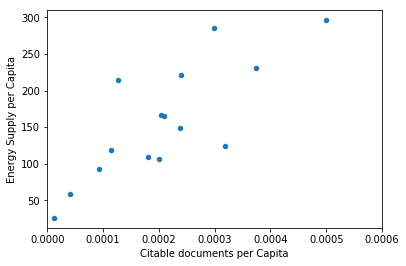

In [35]:
df.plot(x='Citable documents per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [36]:
df.corr(method = 'pearson').iloc[0,1]

0.7940010435442943

### Group countries by Continent and display population statistics

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

In [42]:
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,avgGDP,Pop_estimate,Citable documents per Capita
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,1.367645e+09,0.000093
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,3.176154e+08,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12,1.274094e+08,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12,6.387097e+07,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12,1.435000e+08,0.000128
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.660647e+12,3.523986e+07,0.000500
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12,8.036970e+07,0.000209
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12,1.276731e+09,0.000012
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12,6.383735e+07,0.000203
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,1.106715e+12,4.980543e+07,0.000239


In [55]:
Top15 = Top15.reset_index().rename(columns ={'index': 'Country'})
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
for key, values in ContinentDict.items():
    Top15.loc[Top15['Country'] == key,'Continent'] = values
Top15 = Top15.set_index(['Continent'])
Top15['Pop_estimate'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
cont_df = Top15.groupby('Continent')['Pop_estimate'].agg(['count','sum','mean','std'])
cont_df.columns = ['size','sum','mean','std']
cont_df

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Binning Renewable energy and creating MultiIndex series

In [56]:
Top15.loc[:,'Ren_bin'] = pd.cut(Top15['% Renewable'],5)
Top15.groupby(['Continent','Ren_bin'])['Country'].count()

Continent      Ren_bin         
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: Country, dtype: int64